### This code is to implement bi-directional sweeps in the HD attractor network

In [3]:
import numpy as np
import brainpy.math as bm
import matplotlib.pyplot as plt
from Network_models import HD_cell
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### simulate the HD network

100%|██████████| 4000/4000 [00:00<00:00, 17043.78it/s]


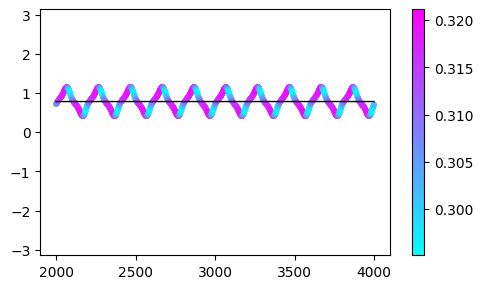

In [5]:
bm.set_dt(0.1)

num_hd = 100

HD_net = HD_cell(num=100, 
                noise_stre=0.01, 
                tau=1., tau_v=10., 
                k=1., mbar=11, a=0.4, A=3., J0=4., 
                z_min=-bm.pi, z_max=bm.pi)

def run_HDNet(i, Head_direction):  # 20 x size

    #calculate TheataModulator at time step i
    ThetaModulator_HD = 1+0.3*bm.cos(i*2*bm.pi/100)
    HD_net.step_run(i, Head_direction, ThetaModulator_HD)
    bump_center = HD_net.center
    bump_activity = HD_net.r
    return bump_center, bump_activity

numT = 4000
time_steps = np.arange(numT)
Head_direction = bm.pi/4*bm.ones(numT) #fixed head direction, mimicking the animal running in a straight line
bump_center, bump_activity = bm.for_loop(run_HDNet, (time_steps, Head_direction), progress_bar=True)
max_bump_activity = np.max(bump_activity, axis=1)

start = 2000
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(time_steps[start:], Head_direction[start:], linewidth=1, color='black')
cb = ax.scatter(time_steps[start:], bump_center[start:], c=max_bump_activity[start:], cmap='cool', s=10)
ax.set_ylim(-bm.pi, bm.pi)
#colorbar
cbar = plt.colorbar(cb, ax=ax)
plt.tight_layout()

In [ ]:
# bm.set_dt(0.1)

# HD_net = HD_cell(num=100, 
#                 noise_stre=0.0, 
#                 tau=1., tau_v=100., 
#                 k=1., mbar=150, a=0.4, A=3., J0=4., 
#                 z_min=-bm.pi, z_max=bm.pi)

# def run_net(i, Head_direction, ThetaInput):  # 20 x size
#     HD_net.step_run(i, Head_direction, ThetaInput)
#     bump_center = HD_net.center
#     bump_activity = HD_net.r
#     return bump_center, bump_activity

# T_theta = 80 #100 ms
# T = 1000 #simulation time in ms
# numT = int(T/bm.get_dt())
# numT_theta = int(T_theta/bm.get_dt())
# time_steps = np.arange(numT)
# ThetaInput = bm.ones(numT)+0.2*bm.sin(time_steps*2*bm.pi/numT_theta)
# Head_direction = bm.pi/4*bm.ones(numT) #fixed head direction, mimicking the animal running in a straight line
# bump_center, bump_activity = bm.for_loop(run_net, (time_steps, Head_direction, ThetaInput), progress_bar=True)
# max_bump_activity = np.max(bump_activity, axis=1)

# start = 1000
# fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# ax.plot(time_steps[start:], Head_direction[start:], linewidth=1, color='black')
# cb = ax.scatter(time_steps[start:], bump_center[start:], c=max_bump_activity[start:], cmap='cool', s=10)
# ax.set_ylim(-bm.pi, bm.pi)
# #colorbar
# cbar = plt.colorbar(cb, ax=ax)
# plt.tight_layout()

#### animation

MovieWriter Pillow unavailable; using Pillow instead.


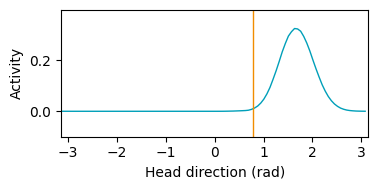

In [125]:
start = 1000
end = 2000
x1 = HD_net.x
ani_data = bump_activity[start:end:10,:]
input_loc = Head_direction[start:end:10]

fig, ax_ani = plt.subplots(1,1, figsize=(4, 2), dpi=100)

ax_ani.set_xlabel('Head direction (rad)')
ax_ani.set_ylabel('Activity')

numframes = ani_data.shape[0]
ylim = np.max(ani_data)*1.1
ax_ani.set_ylim(-0.1, ylim)
ax_ani.set_xlim(-np.pi, np.pi)
# create two lines, the second is a vertical line
line1, =  ax_ani.plot([], [], color='#009FB9', lw=1)
line2, =  ax_ani.plot([], [], color='#F18D00', lw=1)

# 更新线条的函数
def update(i):
    y1 = ani_data[i].flatten()
    line1.set_data(x1, y1)
    line2.set_data([input_loc[i], input_loc[i]], [-0.1, ylim])
    return line1, line2

ani = FuncAnimation(fig, update, frames=numframes, interval=100, blit=False)

ani_filename = './figures/HD_activities.gif'
ani.save(ani_filename, writer='Pillow', fps=10)

#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()

# Display animation inline in Jupyter Notebook
HTML(ani.to_jshtml())